Dada uma imagem, ao invés de eu recortar o rosto simplesmente olhando para a imagem, eu vou fazer esse processo de forma automática, e para fazer esse processo de forma automática, vamos usar um tipo de classificador que se chama classificador em cascata de haar.

Esses classificadores funcionam muito bem para aplicações em tempo real porque a execução deles é particularmente muito rápida, então a forma como ele foi desenvolvido e até mesmo a imagem de entrada que ele recebe - que é uma imagem em escala de cinza, uma imagem que o número características é menor.

Porque estamos falando de um canal versus três canais de uma imagem colorida, isso também contribui para esse classificador funcionar de uma forma bem rápida.

Então vamos fazer um exemplo para vermos como esse classificador funciona e como conseguimos extrair de uma imagem e segmentar uma região de interesse baseado no classificador de rosto frontal por exemplo. 

In [2]:
import cv2
import matplotlib.pyplot as plt

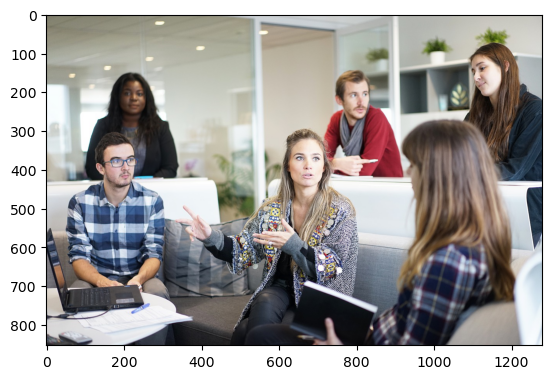

In [5]:
imagem = cv2.imread("imagens/px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)

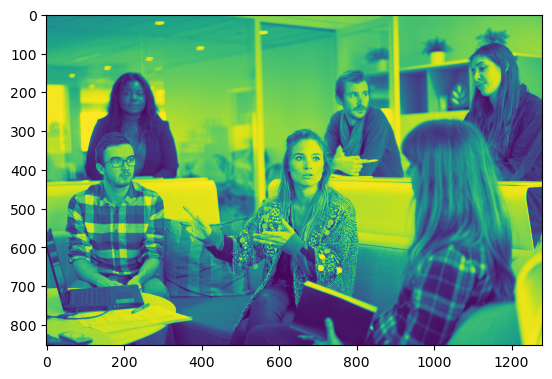

In [9]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

plt.imshow(imagem_gray)

In [23]:
pathfile_haar = "/home/svtrp/anaconda3/envs/wenisSVTRP/share/opencv4/haarcascades/haarcascade_frontalface_default.xml"
classificador = cv2.CascadeClassifier(pathfile_haar)
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)

O primeiro parâmetro se refere à escala, então vou por “, 1.3)”. O que significa isso? O “1.3” significa que, dada uma imagem, vamos diminuir ela - um processo que chamamos de piradimização, um nome técnico.

Vamos diminuir ela até o limite do modelo que foi construído, ou seja, imagine que você tem uma imagem, uma pessoa com o rosto muito grande - por exemplo pode ser até essa pessoa aqui do meio - então quando determinamos que vai ser reduzida em uma taxa de 30%.

 Significa que ele vai fazer a atividade de classificação com a imagem original e depois vai reduzir essa imagem em 30% e vai reduzir de novo em 30%, até chegar no limite onde o classificador foi construído.

 E se não me falha a memória, é algo em torno de 24 x 24px, então ele vai diminuindo até encontrar todos os rostos que são menores, como por exemplo os das pessoas que estão aqui atrás.

 Vocês devem estar perguntando: “Mas por que não aumentar a imagem?”. O problema de você aumentar uma imagem é muito simples: se você tem uma imagem muito pequena e você aumenta ela, você cria uma série de distorções que podem gerar artefatos que podem prejudicar a classificação.

 Por conta disso, a estratégia do Haar Cascade é diminuir a imagem e não aumentá-la, então isso funciona muito bem quando você tem um rosto muito grande na tela. Você pode determinar a melhor taxa para você diminuir e a escolha desse valor.

 Aqui eu estou escolhendo um valor bem alto - 30% - mas vocês podem até tentar outros valores: 10%, 15% ou 20% porque vamos ter mais oportunidade de identificar mais rostos em diferentes proporções.

 O outro parâmetro significa o número mínimo de características vizinhas que ele vai considerar, então o Haar Cascade tem uma condição que vai juntar uma série de características.

 Se essas características minimamente “setadas” nesse parâmetro, como por exemplo “, 5)” - que é o padrão [FORGED REGION] – forem atingidas, então ele vai separar aquela região dizendo que é um rosto. Eu posso ser mais severo ou menos severo, aumentando ou diminuindo esse valor.

 Ele já executou, veja que a execução é bem rápida. Para verificarmos quantos rostos ele identificou, vamos dar o comando aqui “len(faces)”, e ele identificou cinco rostos. Vamos dar uma olhada se acertamos aqui, então temos um rosto aqui, dois, três, quatro e cinco.

 Deu certo porque essa pessoa aqui está com o rosto virado, então não conseguimos observar as características de um rosto para poder de fato identificá-lo. Ela está bem escondida, digamos assim.

In [24]:
len(faces)

5

Então foi aceitável, de fato temos aqui cinco faces. Agora como isso funciona? Como esse algoritmo funciona embaixo do capô? Vamos lá! O classificador de cascata tem uma característica muito importante, ou seja, ele foi feito para executar de forma rápida.

Então pense assim: imagine que temos uma imagem dessa pessoa e vamos ter um retângulo deslizante, esse retângulo deslizante, inclusive vai ser executado em diversos tamanhos.

 Lembra daquela taxa que acabamos de conversar, de 30%? Então esse retângulo, ele vai sempre diminuindo o seu tamanho para poder identificar o maior número de faces possível.

 Ele vai passando essa janela e vai percebendo algumas características. O rosto humano é reconhecido especialmente por termos dois olhos, um nariz e uma boca, então essas são as características marcantes do rosto - sobrancelhas, etc.

 Então o classificador vai buscar essas características, que se você olhar de forma individual - vou achar um olho. Perfeito, achei. Vou procurar por outro olho. Achei também. Vou procurar por um nariz, achei. Vou procurar por uma boca. Achei.

 Quando reunirmos tudo isso, temos enfim um rosto humano identificado, um rosto humano frontal - e é onde o detector consegue, de fato, localizar uma face. Agora, como detectamos esses padrões?

 Antes disso, temos que tomar cuidado com o que chamamos de falsos positivos. Tem até um termo técnico, que se chama “Paraeidolia”, onde você enxerga rosto humano onde não tem.

 Então se vermos dois olhos, ou seja, duas regiões que se parecem com os olhos em uma região que parece com a boca, nós falamos: “Tem um rosto ali!”. Aqui temos alguns exemplos, então isso para o classificador também acontece. Às vezes ele pode entender um padrão que é parecido com o do rosto humano, mas não é.

 Então isso aqui é o que chamamos de imagens negativas e o Classificador de Haar foi construído exatamente para também excluir as imagens negativas, então como funciona a identificação de padrões?

 Ela é feita por meio de filtros, então temos filtros de borda e filtros de linha, onde à medida que vamos analisando uma imagem, vamos passando esses filtros ao longo da imagem inteira para verificar se existe, de fato, um padrão que se aproxima desses aqui que eu apresentei.

 Por exemplo: se pegarmos aqui essa parte do olho humano. Vocês vão perceber que antes de chegar na sobrancelha - por exemplo aqui na parte da pele é uma região mais clara, quando chega na sobrancelha é uma região mais escura, então eles se encaixam muito bem com esse filtro de linha, então o branco aqui eu entendo que é uma região mais escura e esse padrão é marcante.

 Não só nesse olho como também nesse outro olho, como também aqui no nariz, como na boca - então quando juntamos todos esses, que chamamos de classificadores fracos, ele forma um classificador forte que é capaz de identificar um rosto. Com isso ele consegue ser muito robusto e muito veloz na identificação de faces.

 E só para recapitular: ele vai fazer essa identificação de padrões baseado em imagens positivas, ou seja, as imagens dos rostos, mas também vamos levar em consideração as imagens negativas para ele excluir.

 Ou seja, se por acaso alguma imagem negativa for identificada como o rosto, ele vai consultar se nessa base é uma imagem negativa e portanto ele vai excluir, ou seja, ele não vai considerar aquela imagem como uma imagem que tem o rosto. Isso ajuda muito a diminuir bastante o número de falsos positivos.

In [25]:
faces[0]

array([1088,  102,  101,  101], dtype=int32)

In [33]:
imagem_anotada = imagem.copy()

In [34]:
for (x,y,w,h) in faces:
    cv2.rectangle(imagem_anotada, (x,y), (x+w, y+h), (255, 255, 0), 2)

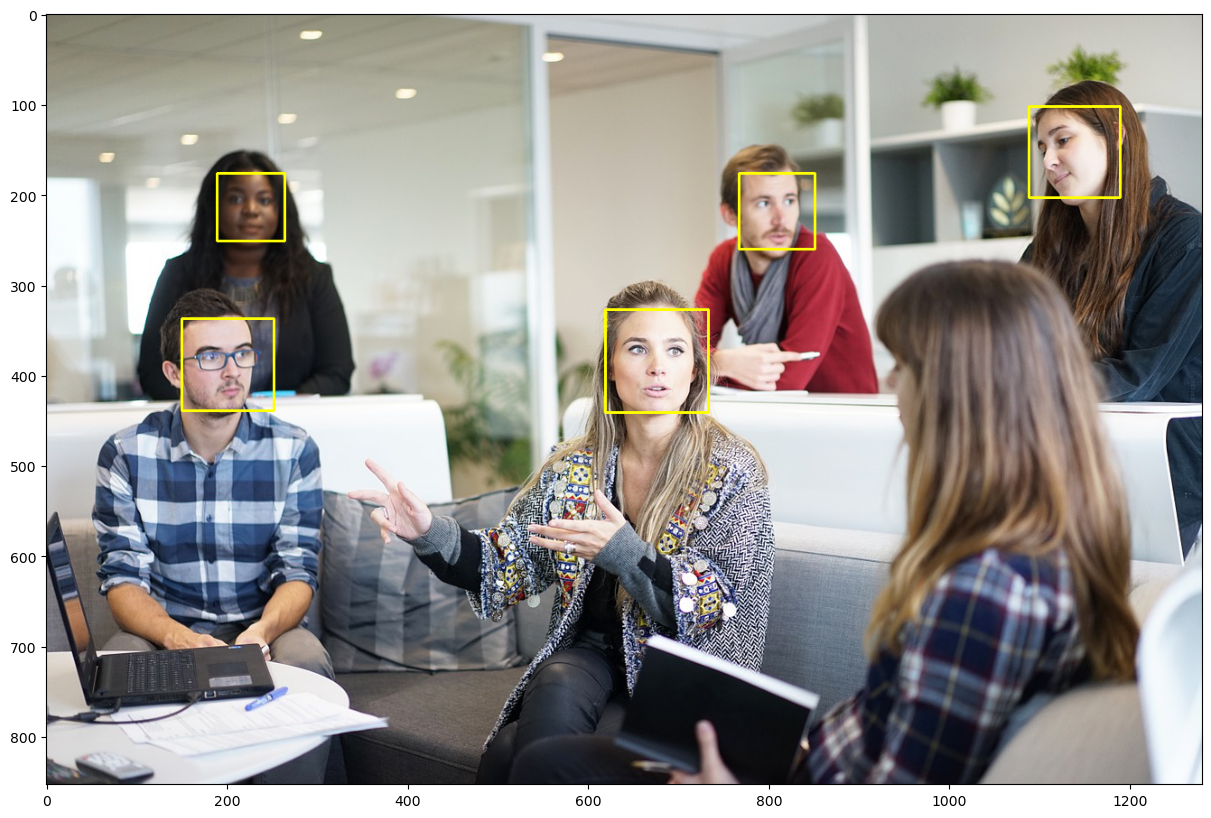

In [36]:
plt.figure(figsize = (20,10))
plt.imshow(imagem_anotada)

In [39]:
face_imagem = 0

for (x,y,w,h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_imagem) + ".png", imagem_roi)
